# Exploration of Airbnb data from Malaga

Data from [Inside Airbnb](http://insideairbnb.com/)

Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## TOC ##
- [Initial Exploration](#initial-exploration)
- [First transformations](#first-transformations)
    - [Listing dataframe](#listing-dataframe)
    - [Calendar dataframe](#calendar-dataframe)
    - [Date and time](#data-and-time)
- [Checks](#checks)
- [Analysis (jump here if you want to skip the preparation work)](#analysis)
    - [Room type. Count and percentage](#room-type-count-and-percentage)
    - [What makes a place popular?](#what-makes-a-place-popular)
    - [Appendix](#appendix)


## Initial Exploration ##

Reading the data. In this case I have used already downloaded files to avoid unnecessary downloads. Uncomment for taking it directly from the web

In [2]:
#listing = pd.read_csv('http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2022-09-28/data/listings.csv.gz')
#calendar= pd.read_csv('http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2022-09-28/data/calendar.csv.gz')
#reviews=pd.read_csv('http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2022-09-28/data/reviews.csv.gz')
#neighbourhoods= pd.read_csv("http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2022-09-28/visualisations/neighbourhoods.csv")

In [3]:
wd = os.getcwd()+"/"
listing =pd.read_csv(wd+"listings.csv.gz")
calendar= pd.read_csv(wd+"calendar.csv.gz")
reviews=pd.read_csv(wd+"reviews.csv.gz")
neighbourhoods= pd.read_csv(wd+"neighbourhoods.csv")

Let's explore all the dataframes created

In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8481 non-null   int64  
 1   listing_url                                   8481 non-null   object 
 2   scrape_id                                     8481 non-null   int64  
 3   last_scraped                                  8481 non-null   object 
 4   source                                        8481 non-null   object 
 5   name                                          8481 non-null   object 
 6   description                                   8468 non-null   object 
 7   neighborhood_overview                         4401 non-null   object 
 8   picture_url                                   8481 non-null   object 
 9   host_id                                       8481 non-null   i

And it's firts rows:

In [5]:
listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,https://www.airbnb.com/rooms/96033,20220928234716,2022-09-29,city scrape,"* Cosy flat 200m from the beach, El Palo/Malaga *",Bonito piso de 2 dormitorios a 200m de la play...,"A 200 metros de las playas de El Palo, antiguo...",https://a0.muscache.com/pictures/32780788/e487...,510467,...,4.90,4.43,4.61,VFT/MA/22043,f,1,1,0,0,1.41
1,166473,https://www.airbnb.com/rooms/166473,20220928234716,2022-09-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,793360,...,4.91,4.79,4.67,CTC/2018118027,f,4,0,4,0,0.63
2,212845,https://www.airbnb.com/rooms/212845,20220928234716,2022-09-29,city scrape,BEAUTIFUL DOUBLE ROOM IN MALAGA,"Beautifull double room with toilet, in Malaga...",NaN,https://a0.muscache.com/pictures/d4a19330-03c4...,617998,...,4.87,4.53,4.74,VFT/MA/09354,f,2,0,1,1,0.31
3,229511,https://www.airbnb.com/rooms/229511,20220928234716,2022-09-29,city scrape,MOUNTAIN VILLA WITH SEAVIEWS - PRIVATE POOL,Country house in rural Provencal style.<br /><...,"Country house next to Natural park, just 25 m...",https://a0.muscache.com/pictures/2102051/2743a...,1198693,...,5.00,4.00,5.00,VFT/ MA/22170,f,2,2,0,0,0.06
4,330760,https://www.airbnb.com/rooms/330760,20220928234716,2022-09-29,city scrape,Malaga Lodge Guesthouse Double room-shared bath.,The Lodge is set in a charming town house in L...,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,...,4.62,4.46,4.50,VFT/MA/12240,t,3,1,2,0,0.36


*"neighbourhood_group_cleansed"*, *"bathrooms"* and *"calendar_updated"* are all-null-series, so no information can be extracted from there.

Let's explore now the calendar dataframe:

In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095565 entries, 0 to 3095564
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 165.3+ MB


And reviews:

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283187 entries, 0 to 283186
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     283187 non-null  int64 
 1   id             283187 non-null  int64 
 2   date           283187 non-null  object
 3   reviewer_id    283187 non-null  int64 
 4   reviewer_name  283187 non-null  object
 5   comments       283179 non-null  object
dtypes: int64(3), object(3)
memory usage: 13.0+ MB


In [8]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,96033,8152056,2013-10-18,366364,Vera,My stay at the apartment of Adriana and Rafa w...
1,96033,8689156,2013-11-12,4862098,Sarah,The flat was perfect for our holiday in Malaga...
2,96033,11275860,2014-03-27,12189558,Andrea,The reservation was canceled 8 days before arr...
3,96033,11862773,2014-04-17,2236416,Galina,El piso esta muy lindo y comido :) No había in...
4,96033,12689717,2014-05-08,13440727,Patricia,We had some trouble finding the appartment at ...


The neighbourhoods dataframe:

In [9]:
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Bailen-Miraflores
1,NaN,Campanillas
2,NaN,Carretera de Cadiz
3,NaN,Centro
4,NaN,Churriana


In [10]:
neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        11 non-null     object 
dtypes: float64(1), object(1)
memory usage: 304.0+ bytes


This last one does not add a much information.

## First transformations ##

### Listing Dataframe ###
#### Bathrooms ####

Now, let's work in the first dataframe, listings. The bathrooms series is all-null and it could be a good source of information in order to determine the quality of a place. Maybe we can extract the information from other series:

In [11]:
listing["bathrooms_text"]

0                 1 bath
1         2 shared baths
2       1.5 shared baths
3                2 baths
4       1.5 shared baths
              ...       
8476             2 baths
8477              1 bath
8478              1 bath
8479              1 bath
8480             3 baths
Name: bathrooms_text, Length: 8481, dtype: object

In [12]:
listing["nb_bathrooms"]=pd.to_numeric(listing["bathrooms_text"].str.extract("^(\d+\.?\d*)\s",expand= False))
listing["nb_bathrooms"]

0       1.0
1       2.0
2       1.5
3       2.0
4       1.5
       ... 
8476    2.0
8477    1.0
8478    1.0
8479    1.0
8480    3.0
Name: nb_bathrooms, Length: 8481, dtype: float64

Also, knowing if the bathrooms are shared or not could be useful:

In [13]:
listing["bathroom_is_shared"]= listing["bathrooms_text"].str.contains("shared")
listing["bathroom_is_shared"]

0       False
1        True
2        True
3       False
4        True
        ...  
8476    False
8477    False
8478    False
8479    False
8480    False
Name: bathroom_is_shared, Length: 8481, dtype: object

#### Price ###

Other potentially useful information is the price of the place. In the initial exploration it was shown that it was a text series

In [14]:
listing["price"]

0        $54.00
1        $21.00
2        $39.00
3       $191.00
4        $48.00
         ...   
8476    $265.00
8477     $31.00
8478     $90.00
8479    $112.00
8480    $125.00
Name: price, Length: 8481, dtype: object

In [15]:
def dollars_to_numeric (ser):
    """
    (series) -> (series)
    Takes a text series in which prices are written $xx.xx and return its numeric value
    """
    removed_sp_char = ser.str.extract(pat="\$(.*)",expand=False)
    return pd.to_numeric(removed_sp_char, errors="coerce")

In [16]:
listing=listing.assign(price_numeric = dollars_to_numeric(listing["price"]))
listing["price_numeric"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 8481 entries, 0 to 8480
Series name: price_numeric
Non-Null Count  Dtype  
--------------  -----  
8374 non-null   float64
dtypes: float64(1)
memory usage: 66.4 KB


In [17]:
listing["price_numeric"].head()

0     54.0
1     21.0
2     39.0
3    191.0
4     48.0
Name: price_numeric, dtype: float64

### Calendar Dataframe ###

#### Price ####

OK. With calendar we have more or less the same situation:

In [18]:
calendar = calendar.assign(\
                            numeric_price= dollars_to_numeric(calendar.price),\
                            numeric_adj_price= dollars_to_numeric(calendar.adjusted_price),\
                            )

In [19]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,numeric_price,numeric_adj_price
0,96033,2022-09-29,f,$55.00,$55.00,4,1125,55.0,55.0
1,96033,2022-09-30,f,$55.00,$55.00,4,1125,55.0,55.0
2,96033,2022-10-01,f,$55.00,$55.00,4,1125,55.0,55.0
3,96033,2022-10-02,f,$55.00,$55.00,4,1125,55.0,55.0
4,96033,2022-10-03,f,$55.00,$55.00,4,1125,55.0,55.0


### Data and time ###

Now, let's convert all date series (stored as text) to *datetime64*

* In calendar:

In [20]:
calendar["date_timestamp"]=pd.to_datetime(calendar["date"])
calendar.date_timestamp

0         2022-09-29
1         2022-09-30
2         2022-10-01
3         2022-10-02
4         2022-10-03
             ...    
3095560   2023-09-24
3095561   2023-09-25
3095562   2023-09-26
3095563   2023-09-27
3095564   2023-09-28
Name: date_timestamp, Length: 3095565, dtype: datetime64[ns]

* In reviews:

In [21]:
reviews["date_as_datetime64"]=pd.to_datetime(reviews["date"])
reviews.date_as_datetime64

0        2013-10-18
1        2013-11-12
2        2014-03-27
3        2014-04-17
4        2014-05-08
            ...    
283182   2022-09-05
283183   2022-09-12
283184   2022-09-07
283185   2022-09-10
283186   2022-09-06
Name: date_as_datetime64, Length: 283187, dtype: datetime64[ns]

## Checks ##

* There are no repeated listings in the listing dataframe:

In [22]:
listing["listing_url"].duplicated().value_counts()

False    8481
Name: listing_url, dtype: int64

* Checking that there are 31,30 or 28 occurrences for every month in calendar. Incomplete month has been discarded:

In [23]:
start_date, end_date = '2022-10-01', '2023-08-31'
calendar[["date","date_timestamp","listing_id"]].\
                                                    query('date >= @start_date and date <= @end_date').\
                                                    groupby([calendar.date_timestamp.dt.year,calendar.date_timestamp.dt.month,"listing_id"]).\
                                                    count()["date"].value_counts()

31    59367
30    25443
28     8481
Name: date, dtype: int64

* Checking that there are available and not available days:

In [24]:
calendar.pivot_table(index=[calendar.date_timestamp.dt.year,calendar.date_timestamp.dt.month], columns=['available'],values=['listing_id'],aggfunc='count')

listing_id        
available                              f       t
date_timestamp date_timestamp                   
2022           9                   13350    3612
               10                 147813  115098
               11                  96144  158286
               12                  92556  170355
2023           1                  111973  150938
               2                  104019  133449
               3                  114463  148448
               4                  127976  126454
               5                  126007  136904
               6                  123202  131228
               7                  133462  129449
               8                  135252  127659
               9                  120504  116964

## Analysis

### Room type. Count and percentage ###

In numbers:

In [25]:
room_types = pd.DataFrame(\
                          {"count":listing["room_type"].value_counts(),\
                           "percentage": listing["room_type"].value_counts(normalize=True)*100}\
                          )
room_types

,count,percentage
Entire home/apt,7390,87.135951
Private room,1054,12.427780
Shared room,21,0.247612
Hotel room,16,0.188657


Count plot and percentage plot (using histogram):

In [26]:
def annotate_plot (plt_obj, annotation_arr, hor_align ="center"):
    """
    Simple annotation of values in a plot.
    By default horizontally centered and verticaly on top of the bar/point
    """
    for i in range(len(annotation_arr)):
        plt_obj.annotate(str(annotation_arr[i]),xy=(i,annotation_arr[i]), horizontalalignment=hor_align)

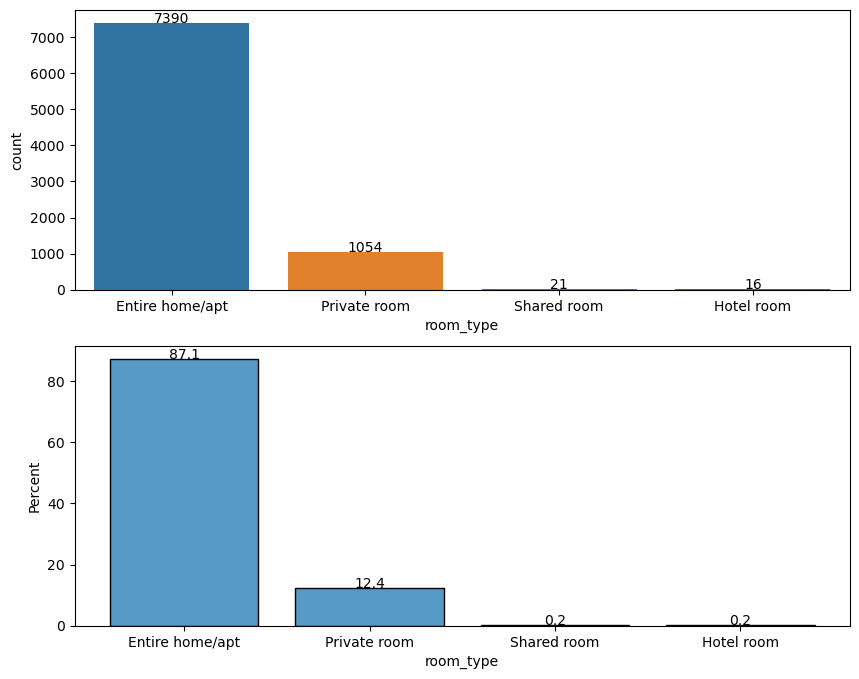

In [27]:
plt.figure(1,figsize=(10,8))
plt.subplot(211)
room_type_countplot =sns.countplot(data=listing,x="room_type")
annotate_plot(room_type_countplot, room_types["count"])
room_type_percentage_plot = plt.subplot(212)
sns.histplot(data=listing,x="room_type",stat="percent", shrink =0.8)
annotate_plot(room_type_percentage_plot, room_types["percentage"].round(decimals=1))

### Listings per hosts ###

Now let's see how see how many listings every hosts have. That way we can have an idea of how many are smallholders and how many bigholders:

* Listings per hosts:

In [28]:
listings_per_host= listing[["host_id","id"]].\
                                            groupby("host_id").agg("count").\
                                            sort_values(by='id',ascending=False).\
                                            rename(columns={"id": "listing_count"})
listings_per_host

,listing_count
host_id,
80225433,162
63293666,149
115528688,102
5890675,98
317065206,83
...,...
92599053,1
92613704,1
92652828,1


<AxesSubplot:xlabel='listing_count', ylabel='Count'>

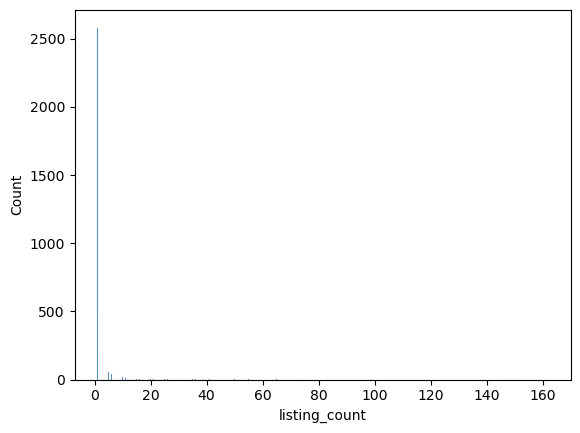

In [29]:
sns.histplot(data=listings_per_host, x= "listing_count")

Values are widespread. Let's see where fall the 98% of the owners.
For that, we need first a way to calculate the cumulative percentage:

In [30]:
def cumulative_percentage (series):
    """
    (series) -> (series)
    Takes a series and returns its cumulative percentage
    """ 
    return (100 *series.cumsum()/series.sum())

def percentage (series):
    """
    (series) -> (series)
    Takes a series and returns its percentage vs the total sum
    """ 
    return (series/series.sum()*100)

In [31]:

#df[cum_percent] = 100 * (df[‘column_name’].cumsum()/df[‘column_name’].sum()) 
listings_per_host_freq =pd.DataFrame({"frequency":listings_per_host.value_counts()})
#listings_per_host_freq["percent"]= listings_per_host_freq["frequency"]/(listings_per_host_freq["frequency"].sum())*100
#listings_per_host_freq["cum_percent"] = 100 * (listings_per_host_freq["frequency"].cumsum()/listings_per_host_freq["frequency"].sum()) 
listings_per_host_freq["percent"]= percentage(listings_per_host_freq["frequency"])
listings_per_host_freq["cum_percent"]= cumulative_percentage(listings_per_host_freq["frequency"])
listings_per_host_freq.query("cum_percent < 98")


,frequency,percent,cum_percent
listing_count,,,
1,2581,70.770496,70.770496
2,489,13.408281,84.178777
3,191,5.237181,89.415958
4,112,3.071017,92.486976
5,57,1.562928,94.049904
6,41,1.124212,95.174116
7,33,0.904853,96.078969
8,23,0.630655,96.709624
10,17,0.466137,97.175761


98% of hosts have 11 listings or less

### Shared bathroom has an influence in the reviews scores? ###

Another analysis that can be done using the information previously calculated. A listing with a shared bathroom is likely to perceived as of less quality, so maybe its rating is worst than listing with private bathroom?:

<AxesSubplot:xlabel='bathroom_is_shared', ylabel='review_scores_rating'>

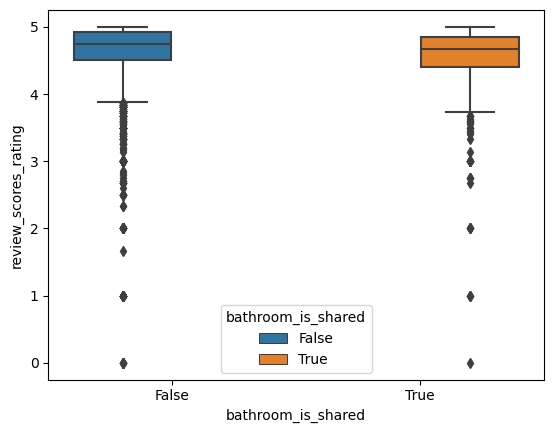

In [32]:
sns.boxplot(data=listing, y="review_scores_rating", x= "bathroom_is_shared", hue= "bathroom_is_shared")

Doesn't seem to be a difference.

-----

### Distribution of the reviews ###

Now, let's see where fall the scores from the reviews:

<AxesSubplot:xlabel='review_scores_rating', ylabel='Percent'>

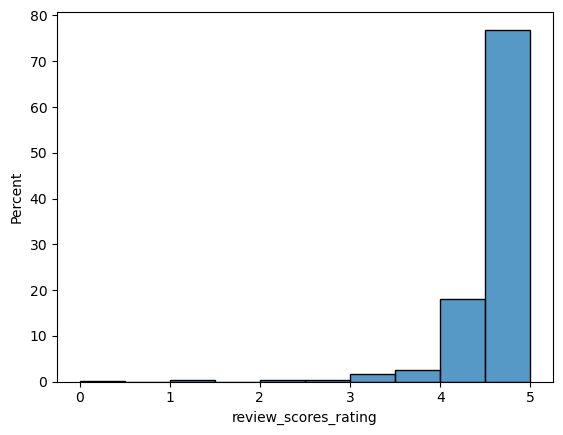

In [33]:
sns.histplot(data=listing, x="review_scores_rating", bins=10, stat ="percent")

So according to the listing dataframe, the majority of the places obtain revies between 4 and 5 stars (they are perceived as good or very good).
It would be great to be able to double check this information with the reviews dataframe, but the scored given with the revire is not part of the dataframe:

In [34]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283187 entries, 0 to 283186
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   listing_id          283187 non-null  int64         
 1   id                  283187 non-null  int64         
 2   date                283187 non-null  object        
 3   reviewer_id         283187 non-null  int64         
 4   reviewer_name       283187 non-null  object        
 5   comments            283179 non-null  object        
 6   date_as_datetime64  283187 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 15.1+ MB


-----

### Top hosts ###

In [66]:
top_hosts=pd.pivot_table(data=listing, aggfunc="count", fill_value=0, index=["host_id","host_name"], columns="room_type", values="id", margins=True,margins_name='Total').sort_values(by=["Total"], ascending=False).drop(index=("Total","")).iloc[0:10]
top_hosts

,room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
host_id,host_name,,,,,
80225433,I Loft Malaga,162,0,0,0,162
63293666,Atanas,149,0,0,0,149
115528688,Trinidad,97,0,5,0,102
5890675,La Recepción,98,0,0,0,98
317065206,María,80,0,3,0,83
17499500,Homeabout,64,0,10,0,74
2477923,Caleta Homes,73,0,0,0,73
94173177,Living4Malaga,65,0,0,0,65
8544512,Malaga Center Flat,47,0,8,0,55


------------------------

### Short and long term rentals ###

Based in the minimun nights of every listing, we can figure out which ones are targeted to long term rental seekers and which ones to short term ones.

First, we need compute the mean of minimum nights per listing (from the calendar dataframe):

In [97]:
avg_min_nights_per_listing= calendar.loc[:,["listing_id","minimum_nights"]].groupby("listing_id").mean().reset_index()

In [98]:
avg_min_nights_per_listing.head()

,listing_id,minimum_nights
0,96033,4.0
1,166473,5.0
2,212845,2.0
3,229511,5.0
4,330760,1.0


Then, we can define a function that, depending on a threshold, it returns if the listing is a short-term or long-term rental:

In [87]:
def determine_short_and_long_term (thr, data):
    """
    Given a threshold, determine if the listing is considered a short-term (less or equal to threshold) or a long-term rental
    """
    if data <= thr:
        return "short-term"
    else:
        return "long-term"

And apply it to the correpondent series and expand the dataframe. The threshold has been set to 30 days:

In [100]:
avg_min_nights_per_listing["short_long_term"]=pd.Series(np.vectorize(determine_short_and_long_term)(30,avg_min_nights_per_listing["minimum_nights"]))

In [101]:
avg_min_nights_per_listing

,listing_id,minimum_nights,short_long_term
0,96033,4.000000,short-term
1,166473,5.000000,short-term
2,212845,2.000000,short-term
3,229511,5.000000,short-term
4,330760,1.000000,short-term
...,...,...,...
8476,725126568184022208,1.000000,short-term
8477,725224449049872311,1.000000,short-term
8478,725258043670889300,1.000000,short-term
8479,725777249888162085,1.282192,short-term


Alternatively, it could have been done as follows: 

In [109]:
(avg_min_nights_per_listing["minimum_nights"] <=30).value_counts()

True     8378
False     103
Name: minimum_nights, dtype: int64

And its percentage:

In [110]:
(avg_min_nights_per_listing["minimum_nights"] <=30).value_counts(normalize=True)

True     0.987855
False    0.012145
Name: minimum_nights, dtype: float64

98.8% are short-term.

(0.0, 35.0)

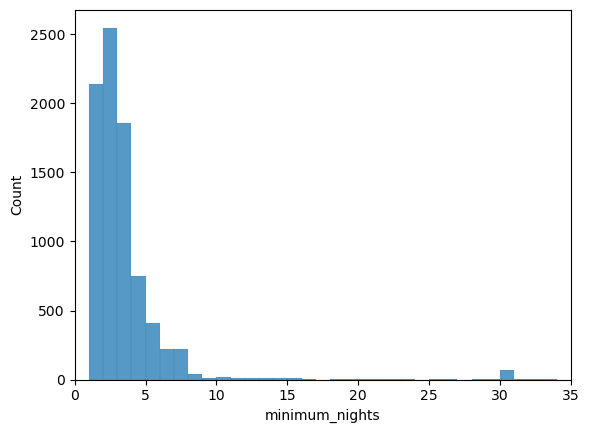

In [83]:
sns.histplot(data=avg_min_nights_per_listing,x="minimum_nights", binwidth=1).set_xlim((0,35))


(0.0, 35.0)

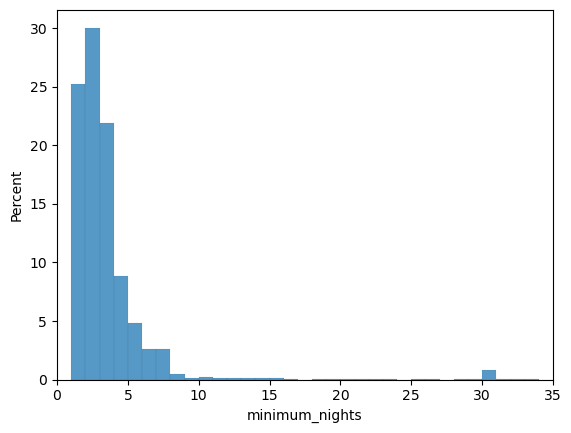

In [112]:
sns.histplot(data=avg_min_nights_per_listing,x="minimum_nights", binwidth=1, stat="percent").set_xlim((0,35))

---------------------

### What makes a place popular? ###

Now, let's try to determine what makes a place sucessful. With the calendar dataframe we can see how many available days have every listing in the future. It seems logical to think that a succesful place will be booked much more in advance than one not so succesful.
So, the first part will be to determine the total number of nights already booked. Then we will see if there is a correlation between the total number of nights booked and other parameters that may be indicators of popularity (number of reviews per month and reviews score value).

#### Calculation of already booked nights ####

In [35]:
already_booked=calendar[["listing_id","available","numeric_adj_price"]].query("available == 'f'").groupby("listing_id").agg(\
                                                                                                                       avg_adj_price=pd.NamedAgg(column="numeric_adj_price", aggfunc="mean"),\
                                                                                                                       booked_nights=pd.NamedAgg(column="available", aggfunc="count")\
                                                                                                                      ).sort_values(by="booked_nights", ascending= False)\
                                                                                                                    .reset_index()

In [36]:
already_booked

,listing_id,avg_adj_price,booked_nights
0,34571853,65.0,365
1,31299790,98.0,365
2,14864397,60.0,365
3,39188866,35.0,365
4,50386953,200.0,365
...,...,...,...
8216,33769894,90.0,1
8217,620262434808268200,43.0,1
8218,49583135,106.0,1
8219,700387795036281853,124.0,1


Now, we can extend the listing dataframe with this information:

In [37]:
listing_ext=(listing.merge(right=already_booked,how="left",left_on=["id"], right_on="listing_id" ))

#### Correlation between review_scores_value, reviews_per_month and booked_nights ####

We can check if there is a reationship between this three parameters. Beforehand, it seems logical that a correlation should exist (listings with better reviews scores should have more reviews per month because they are more popular and therefore should be the ones that people book more in advance -more booked nights in the future-). However:

In [38]:
listing_ext[["review_scores_value","reviews_per_month", "booked_nights"]].corr()

,review_scores_value,reviews_per_month,booked_nights
review_scores_value,1.000000,0.136229,0.053781
reviews_per_month,0.136229,1.000000,0.000936
booked_nights,0.053781,0.000936,1.000000


Does not seem to be a strong correlation. Let's check it visually:

In [39]:
#Parece que no tiene mucha correlación

##### Visual check #####

###### Scatterplot review_scores_value and reviews_per_month ######

<AxesSubplot:xlabel='review_scores_value', ylabel='reviews_per_month'>

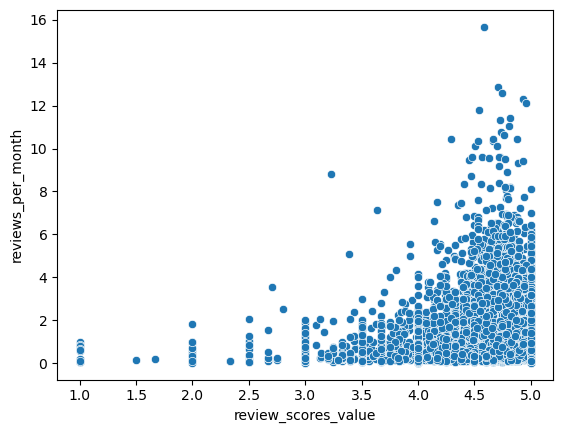

In [40]:
sns.scatterplot(data=listing_ext, x="review_scores_value", y="reviews_per_month")

In [41]:
#No parece que tenga mucha

###### Scatterplot review_scores_value and booked_nights ######

<AxesSubplot:xlabel='review_scores_value', ylabel='booked_nights'>

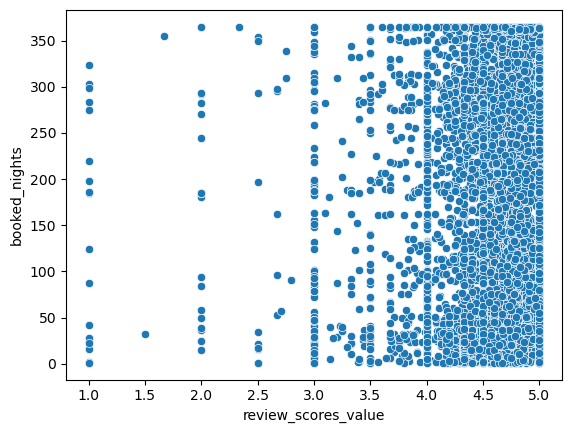

In [42]:
sns.scatterplot(data=listing_ext, x="review_scores_value", y="booked_nights")

###### Scatterplot review_per_month and reviews_per_month ######

<AxesSubplot:xlabel='reviews_per_month', ylabel='booked_nights'>

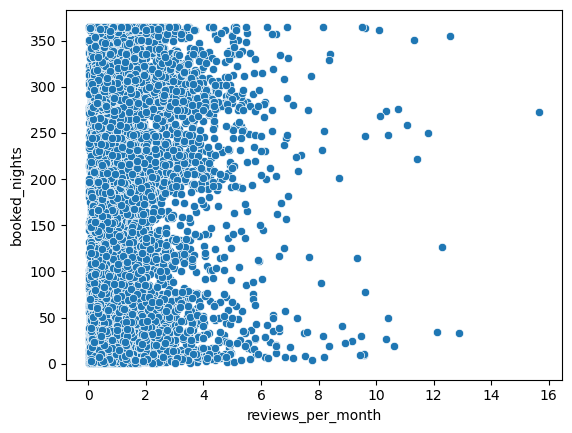

In [43]:
sns.scatterplot(data=listing_ext, x="reviews_per_month", y="booked_nights")

### Appendix ###

#### Calculation of total reviews per listing ####

In [44]:
reviews_per_listing = reviews[["listing_id","id"]].\
                                                    groupby("listing_id").\
                                                    count().\
                                                    rename(columns={"id":"reviews_per_listing"}).\
                                                    sort_values(by="reviews_per_listing", ascending= False).\
                                                    reset_index()
reviews_per_listing

,listing_id,reviews_per_listing
0,10802138,741
1,2343063,720
2,2336145,627
3,30141259,586
4,18369830,506
...,...,...
7259,576658091225693763,1
7260,578222781238635203,1
7261,579484204761152692,1
7262,579556109687702640,1


<AxesSubplot:xlabel='reviews_per_listing', ylabel='Percent'>

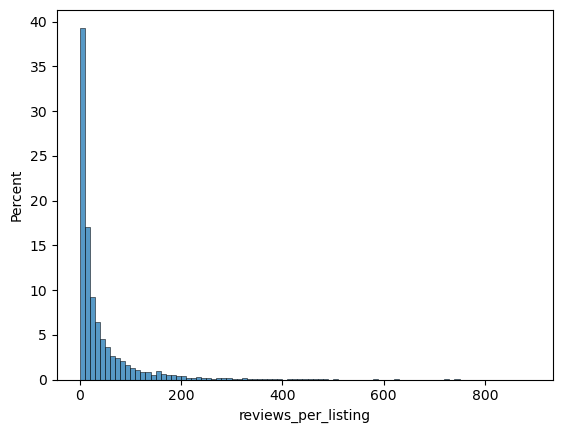

In [45]:
sns.histplot(data=reviews_per_listing,x="reviews_per_listing",bins=np.arange(0,900,10),stat='percent')

In [46]:
#Check that listing id is unique (to avoid strange things when joining). Unnecesary due to group by
reviews_per_listing.index.to_series().duplicated().value_counts()

False    7264
dtype: int64

In [47]:
listing.merge(right=reviews_per_listing, how="left", left_on="id", right_on="listing_id")

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,nb_bathrooms,bathroom_is_shared,price_numeric,listing_id,reviews_per_listing
0,96033,https://www.airbnb.com/rooms/96033,20220928234716,2022-09-29,city scrape,"* Cosy flat 200m from the beach, El Palo/Malaga *",Bonito piso de 2 dormitorios a 200m de la play...,"A 200 metros de las playas de El Palo, antiguo...",https://a0.muscache.com/pictures/32780788/e487...,510467,...,1,1,0,0,1.41,1.0,False,54.0,96033.0,154.0
1,166473,https://www.airbnb.com/rooms/166473,20220928234716,2022-09-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,793360,...,4,0,4,0,0.63,2.0,True,21.0,166473.0,85.0
2,212845,https://www.airbnb.com/rooms/212845,20220928234716,2022-09-29,city scrape,BEAUTIFUL DOUBLE ROOM IN MALAGA,"Beautifull double room with toilet, in Malaga...",NaN,https://a0.muscache.com/pictures/d4a19330-03c4...,617998,...,2,0,1,1,0.31,1.5,True,39.0,212845.0,40.0
3,229511,https://www.airbnb.com/rooms/229511,20220928234716,2022-09-29,city scrape,MOUNTAIN VILLA WITH SEAVIEWS - PRIVATE POOL,Country house in rural Provencal style.<br /><...,"Country house next to Natural park, just 25 m...",https://a0.muscache.com/pictures/2102051/2743a...,1198693,...,2,2,0,0,0.06,2.0,False,191.0,229511.0,4.0
4,330760,https://www.airbnb.com/rooms/330760,20220928234716,2022-09-29,city scrape,Malaga Lodge Guesthouse Double room-shared bath.,The Lodge is set in a charming town house in L...,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,...,3,1,2,0,0.36,1.5,True,48.0,330760.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,50352276,https://www.airbnb.com/rooms/50352276,20220928234716,2022-09-29,previous scrape,"Paz, vistas y exclusividad a 5 minutos de la p...","Mi casa es preciosa, es un ático en una zona m...",La Cala del Moral está ubicada a 15 minutos de...,https://a0.muscache.com/pictures/a8ef0ed8-e57f...,406660535,...,1,1,0,0,NaN,2.0,False,265.0,NaN,NaN
8477,32705544,https://www.airbnb.com/rooms/32705544,20220928234716,2022-09-29,previous scrape,Precioso Estudio al Lado Del Mar,Adorable estudio bien decorado con todo lo nec...,Playamar está a sólo diez minutos a pie del ce...,https://a0.muscache.com/pictures/6073ccb6-3346...,925118,...,6,6,0,0,2.02,1.0,False,31.0,32705544.0,87.0
8478,33294303,https://www.airbnb.com/rooms/33294303,20220928234716,2022-09-29,previous scrape,LUXURY PLAYAMAR BEACH II,Disfruta de este magnifico apartamento junto a...,"Ubicación perfecta, pues dispone de la tranqui...",https://a0.muscache.com/pictures/eabafaab-ed76...,72237248,...,4,4,0,0,0.41,1.0,False,90.0,33294303.0,17.0
8479,50607554,https://www.airbnb.com/rooms/50607554,20220928234716,2022-09-29,previous scrape,Brisa Torremolinos,Studio-apartment for 4 people at 100 meters fr...,"At the Costa del Sol, surrounded by good resta...",https://a0.muscache.com/pictures/prohost-api/H...,183280723,...,3,3,0,0,0.10,1.0,False,112.0,50607554.0,1.0
